# PME3481 - Controle e Aplicações

### Configuração do Ambiente e Bibliotecas

Introdução das bibliotecas mais importantes.

In [1]:
%matplotlib inline

import numpy as np
import control as ctrl
import matplotlib.pyplot as plt
import sympy as sy
from tbcontrol.symbolic import routh
import tbcontrol
tbcontrol.expectversion('0.1.8')
import tbcontrol.symbolic

import warnings
warnings.filterwarnings('ignore')

## Forma Linearizada

Dadas as equações não lineares deduzidas pela formualação de Newton-Euler, foi possível desenvolver as formas linearizadas com o auxílio das bibliotecas sympy e tbcontrole.

In [2]:
sy.init_printing()
s = sy.Symbol('s')

### Modelo Linearizado

Lista de constantes

In [3]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0

In [4]:
# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2)), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)), 0, 0, 0]])

B = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

C = np.array([[ 1, 0, 0, 0],
              [ 0, 1, 0, 0],
              [ 0, 0, 1, 0],
              [ 0, 0, 0, 1]])

D = np.array([[ 0, 0],
              [ 0, 0],
              [ 0, 0],
              [ 0, 0]])

cont = ctrl.StateSpace(A, B, C, D)

sys = ctrl.ss(A, B, C, D)
sys

<LinearIOSystem:sys[3]:['u[0]', 'u[1]']->['y[0]', 'y[1]', 'y[2]', 'y[3]']>

### Polos, Frequências Naturais e Fatores de Amortecimento

In [5]:
wn, zeta, poles = cont.damp()

print("Frequências Naturais: ")
print(wn)
print("Polos: ")
print(poles)
print("Amortecimento: ")
print(zeta)

Frequências Naturais: 
[0.00253575 0.         0.07190375 0.07190375]
Polos: 
[-0.00253575+0.j  0.        +0.j  0.07190375+0.j -0.07190375+0.j]
Amortecimento: 
[ 1. nan -1.  1.]


Abaixo há, também, o gráfico dos polos do sistema no plano complexo

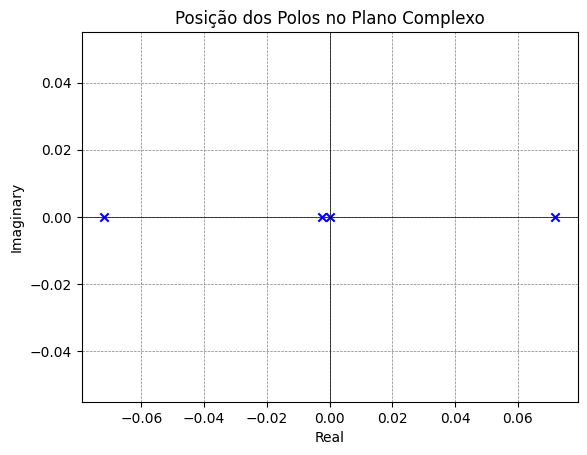

In [6]:
# Plot the poles on a complex plane
plt.figure()
plt.scatter(poles.real, poles.imag, marker='x', color='b')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.title('Posição dos Polos no Plano Complexo')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()

### O Critério de Routh-Hurwitz

In [7]:
# Calcula o polinômio característico
char_poly = sy.Poly(np.poly(A), s)
# char_poly = sy.Poly(np.poly(A.ravel()), s)
char_poly

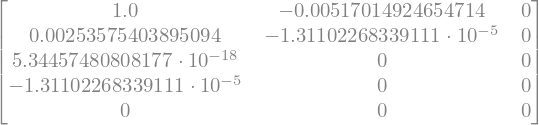

In [8]:
rhm = routh(char_poly)
rhm

## Resposta em Frequência

### Funções de Transferência

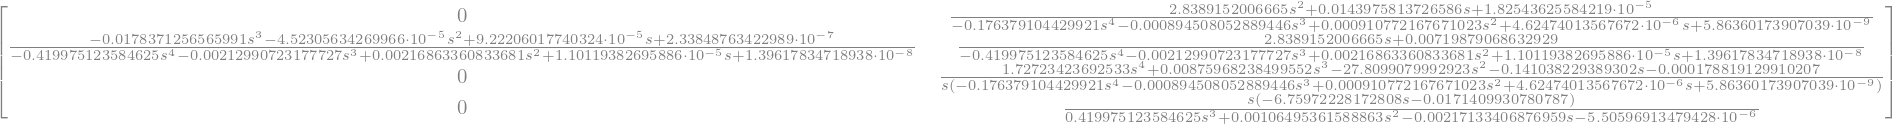

In [9]:
s = sy.symbols('s')
G = sy.simplify(tbcontrol.symbolic.ss2tf(A, B, C, D, s), simplify=False)
G

In [10]:
for i in range(8):
    print(G[i])

0
(2.8389152006665*s**2 + 0.0143975813726586*s + 1.82543625584219e-5)/(-0.176379104429921*s**4 - 0.000894508052889446*s**3 + 0.000910772167671023*s**2 + 4.62474013567672e-6*s + 5.86360173907039e-9)
(-0.0178371256565991*s**3 - 4.52305634269966e-5*s**2 + 9.22206017740324e-5*s + 2.33848763422989e-7)/(-0.419975123584625*s**4 - 0.00212990723177727*s**3 + 0.00216863360833681*s**2 + 1.10119382695886e-5*s + 1.39617834718938e-8)
(2.8389152006665*s + 0.00719879068632929)/(-0.419975123584625*s**4 - 0.00212990723177727*s**3 + 0.00216863360833681*s**2 + 1.10119382695886e-5*s + 1.39617834718938e-8)
0
(1.72723423692533*s**4 + 0.00875968238499552*s**3 - 27.8099079992923*s**2 - 0.141038229389302*s - 0.000178819129910207)/(s*(-0.176379104429921*s**4 - 0.000894508052889446*s**3 + 0.000910772167671023*s**2 + 4.62474013567672e-6*s + 5.86360173907039e-9))
0
s*(-6.75972228172808*s - 0.0171409930780787)/(0.419975123584625*s**3 + 0.00106495361588863*s**2 - 0.00217133406876959*s - 5.50596913479428e-6)


### Frequência

In [11]:
omega = np.logspace(-3, 2, 1000)
s = omega * 1j

In [12]:
G1 = (2.8389152006665 * s**2 + 0.0143975813726586 * s + 1.82543625584219e-5) / (-0.176379104429921 * s**4 - 0.000894508052889446 * s**3 + 0.000910772167671023 * s**2 + 4.62474013567672e-6 * s + 5.86360173907039e-9)
G2 = (-0.0178371256565991 * s**3 - 4.52305634269966e-5 * s**2 + 9.22206017740324e-5 * s + 2.33848763422989e-7) / (-0.419975123584625 * s**4 - 0.00212990723177727 * s**3 + 0.00216863360833681 * s**2 + 1.10119382695886e-5 * s + 1.39617834718938e-8)
G3 = (2.8389152006665 * s + 0.00719879068632929) / (-0.419975123584625 * s**4 - 0.00212990723177727 * s**3 + 0.00216863360833681 * s**2 + 1.10119382695886e-5 * s + 1.39617834718938e-8)
G5 = (1.72723423692533 * s**4 + 0.00875968238499552 * s**3 - 27.8099079992923 * s**2 - 0.141038229389302 * s - 0.000178819129910207) / (s * (-0.176379104429921 * s**4 - 0.000894508052889446 * s**3 + 0.000910772167671023 * s**2 + 4.62474013567672e-6 * s + 5.86360173907039e-9))
G7 = s * (-6.75972228172808 * s - 0.0171409930780787) / (0.419975123584625 * s**3 + 0.00106495361588863 * s**2 - 0.00217133406876959 * s - 5.50596913479428e-6)

list_tf = [G1, G2, G3, G5, G7]

### Diagramas de Bode

In [13]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(omega, np.abs(G))
    ax_phase.semilogx(omega, np.angle(G))

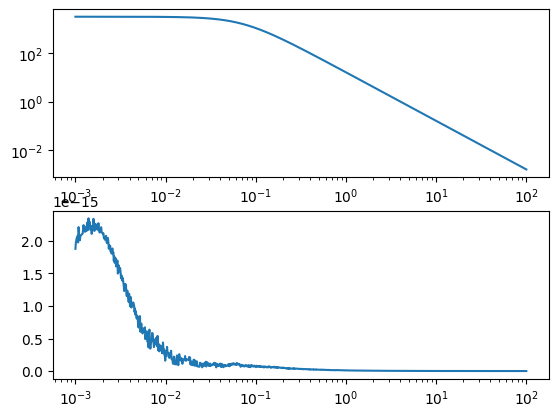

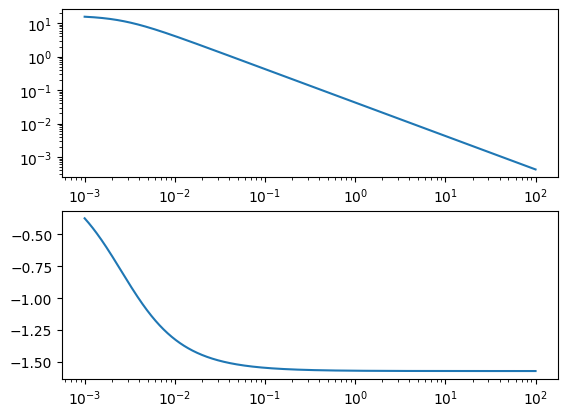

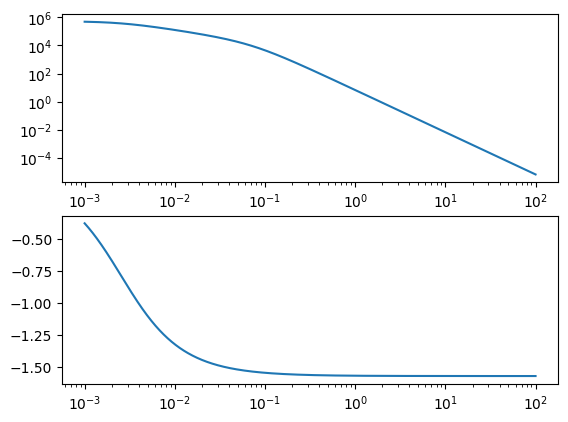

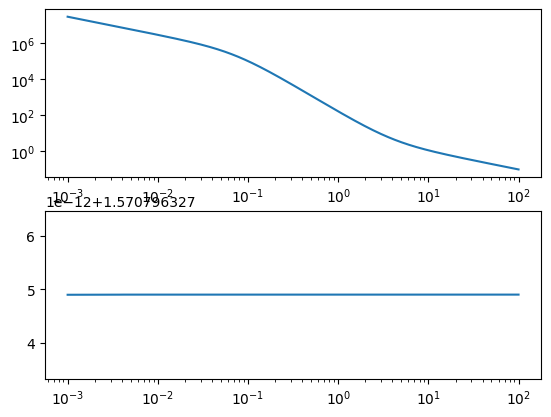

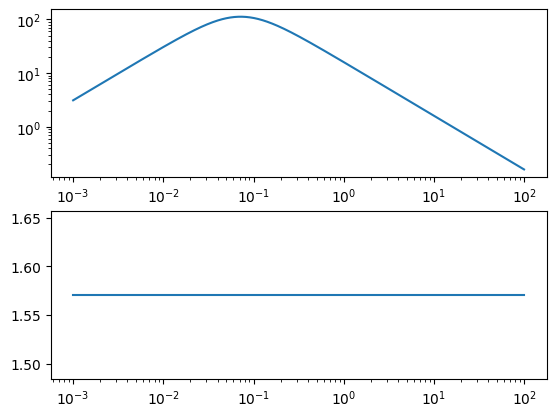

In [14]:
for tfs in list_tf:
    bode(tfs)